<a href="https://colab.research.google.com/github/vicmanw1ld/IA/blob/main/entrenes_con_numpy_y_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

In [ ]:
# Carga el archivo (ajusta la ruta si lo renombraste o lo moviste)
from google.colab import files
archivos = files.upload() # se abre un diálogo; busca y selecciona ENTRENES 2018.xls



Saving ENTRENE_VICTOR_2018.xls to ENTRENE_VICTOR_2018.xls


In [ ]:
# 1) Instala (una sola vez) el lector de .xls antiguos
!pip install -q xlrd==2.0.1
!ls

nombre_archivo = "ENTRENE_VICTOR_2018.xls"   # si tuvieras dudas, lista los archivos con:  !ls
df = pd.read_excel(nombre_archivo, engine="xlrd")

# 3) Comprueba que todo ha entrado bien
display(df.head())   # primeros registros
df.info()            # tipos de dato y nulos

ENTRENE_VICTOR_2018.xls  sample_data


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,JAVIER PONS,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,MASTER EN PREPARACIÓN FÍSICA PARA CORREDORES,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,FITNESS AND SPORT NUTRITION SPECIALIST,NaN,NaN,NaN,NaN,EDAD.........:,0,PESO.........:,0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Teléf.: 607 593 956,NaN,NaN,NaN,NaN,ALTURA......:,171,IMC............:,0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,javierpons@telefonica.net,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   157 non-null    object
 1   Unnamed: 1   358 non-null    object
 2   Unnamed: 2   361 non-null    object
 3   Unnamed: 3   397 non-null    object
 4   Unnamed: 4   390 non-null    object
 5   Unnamed: 5   355 non-null    object
 6   Unnamed: 6   11 non-null     object
 7   Unnamed: 7   4 non-null      object
 8   Unnamed: 8   10 non-null     object
 9   Unnamed: 9   5 non-null      object
 10  Unnamed: 10  5 non-null      object
 11  Unnamed: 11  248 non-null    object
 12  Unnamed: 12  347 non-null    object
 13  Unnamed: 13  244 non-null    object
 14  Unnamed: 14  352 non-null    object
 15  Unnamed: 15  163 non-null    object
dtypes: object(16)
memory usage: 52.5+ KB


In [ ]:
# Carga sin cabecera para poder inspeccionar las primeras filas sin renombrarlas
raw = pd.read_excel(nombre_archivo, header=None, engine="xlrd")

# Muestra las 25 primeras filas para ver dónde empieza la tabla real
for i in range(25):
    print(i, list(raw.iloc[i, :]))   # imprime 8 primeras columnas; ajusta si necesitas ver más

0 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
1 [nan, nan, nan, 'JAVIER PONS', nan, nan, nan, nan, ' ', nan, nan, nan, nan, nan, nan, nan]
2 [nan, nan, nan, 'MASTER EN PREPARACIÓN FÍSICA PARA CORREDORES', nan, nan, nan, nan, ' ', nan, nan, nan, nan, nan, nan, nan]
3 [nan, nan, nan, 'FITNESS AND SPORT NUTRITION SPECIALIST', nan, nan, nan, nan, 'EDAD.........:', 0, 'PESO.........:', 0, nan, nan, nan, nan]
4 [nan, nan, nan, 'Teléf.: 607 593 956', nan, nan, nan, nan, 'ALTURA......:', 171, 'IMC............:', 0, nan, nan, nan, nan]
5 [nan, nan, nan, 'javierpons@telefonica.net', nan, nan, nan, nan, ' ', nan, nan, nan, nan, nan, nan, nan]
6 [nan, ' ', nan, nan, nan, nan, nan, nan, ' ', ' ', ' ', nan, nan, nan, nan, nan]
7 [nan, nan, nan, 'F.C.MAX:', 185, 'F.C. REPOS:', 0, 'UMBRAL ANAERÓBICO:', nan, 172, ' ', nan, nan, nan, nan, nan]
8 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
9 [nan, nan, 'FECHA', 'TIEMPO', 'KMS.', na

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

# 1· Lee de nuevo usando la fila-cabecera correcta
df = (pd.read_excel("ENTRENE_VICTOR_2018.xls",
                    engine="xlrd",
                    header=9)                 # ← la fila 9 se convierte en nombres de columna
        .dropna(axis=1, how="all")            # quita columnas completamente vacías
        .dropna(how="all"))                   # quita filas completamente vacías

# 2· Renombra solo las columnas que nos interesan
colmap = {
    df.columns[1]: "dia_semana",
    df.columns[2]: "fecha",
    df.columns[3]: "tiempo_bruto",
    df.columns[4]: "kms",
    df.columns[6]: "tipo",
    df.columns[11]: "fc_media",
    df.columns[12]: "fc_media_pct",
    df.columns[13]: "fc_max",
    df.columns[14]: "fc_max_pct",
    df.columns[15]: "comentarios",
}
df = df.rename(columns=colmap)[list(colmap.values())]

# 3· Fuera filas-resumen (“semana X”, etc.) → nos quedamos con las que sí tienen fecha
df = df[df["fecha"].notna()]

# 4· Conversión de tipos
df["fecha"] = pd.to_datetime(df["fecha"], dayfirst=True, errors="coerce")
df["kms"]   = pd.to_numeric(df["kms"],   errors="coerce")

# Tiempo de hh:mm:ss → minutos (útil para ritmo)
df["tiempo_min"] = df["tiempo_bruto"].apply(
    lambda t: t.hour*60 + t.minute + t.second/60
              if isinstance(t, dt.time) else np.nan
)

# 5· Métricas derivadas
df = df.sort_values("fecha").set_index("fecha")
df["ritmo_min_km"] = df["tiempo_min"] / df["kms"]
df["velocidad_kmh"] = 60 / df["ritmo_min_km"]

# 6· ¡Listo! Comprueba que todo pinta bien:
display(df.head())
df.info()


,dia_semana,tiempo_bruto,kms,tipo,fc_media,fc_media_pct,fc_max,fc_max_pct,comentarios,tiempo_min,ritmo_min_km,velocidad_kmh
fecha,,,,,,,,,,,,
2017-09-11,LUNES,01:37:14,8.60,NaN,0,0,0.0,0,NaN,97.233333,11.306202,5.306822
2017-09-12,MARTES,01:06:05,14.26,NaN,156,0.843243,181.0,0.978378,"los cambios entre 3,48 y 3:22",66.083333,4.634175,12.947289
2017-09-13,MIÉRCOLES,00:00:00,0.00,NaN,0,0,0.0,0,"no pude entrenar, mal día hoy",0.000000,NaN,NaN
2017-09-14,JUEVES,01:03:34,13.28,NaN,146,0.789189,179.0,0.967568,pedazo de entrenaco con tu hijo respetando los...,63.566667,4.786647,12.534872
2017-09-15,VIERNES,01:10:00,0.00,NaN,0,0,0.0,0,30 min eliptica + gym,70.000000,inf,0.000000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 360 entries, 2017-09-11 to NaT
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dia_semana     357 non-null    object 
 1   tiempo_bruto   357 non-null    object 
 2   kms            339 non-null    float64
 3   tipo           6 non-null      object 
 4   fc_media       243 non-null    object 
 5   fc_media_pct   340 non-null    object 
 6   fc_max         243 non-null    float64
 7   fc_max_pct     349 non-null    object 
 8   comentarios    162 non-null    object 
 9   tiempo_min     356 non-null    float64
 10  ritmo_min_km   220 non-null    float64
 11  velocidad_kmh  220 non-null    float64
dtypes: float64(5), object(7)
memory usage: 36.6+ KB


<ipython-input-8-b3bd5240296e>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample("M")["kms"].sum().plot(kind="bar", figsize=(12,4))


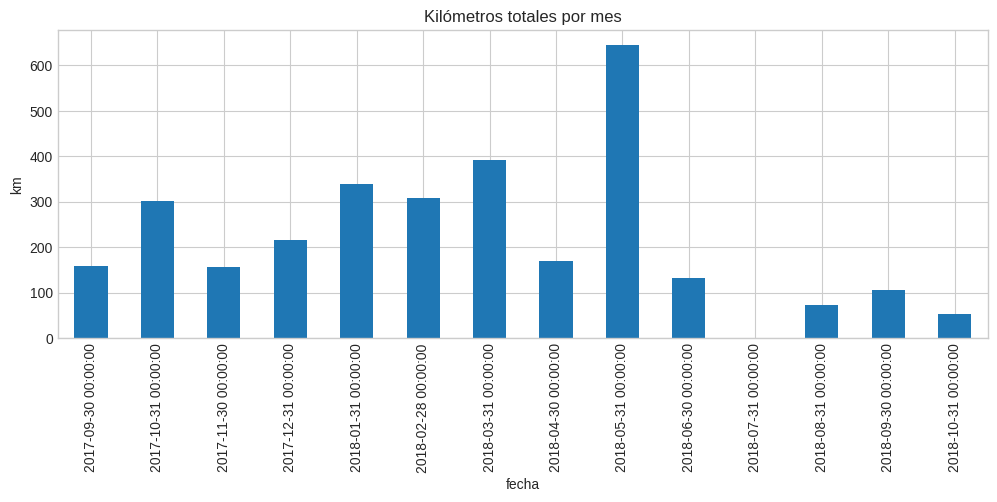

In [ ]:
#Ver el volumen mensual
df.resample("M")["kms"].sum().plot(kind="bar", figsize=(12,4))
plt.title("Kilómetros totales por mes")
plt.ylabel("km")
plt.show()


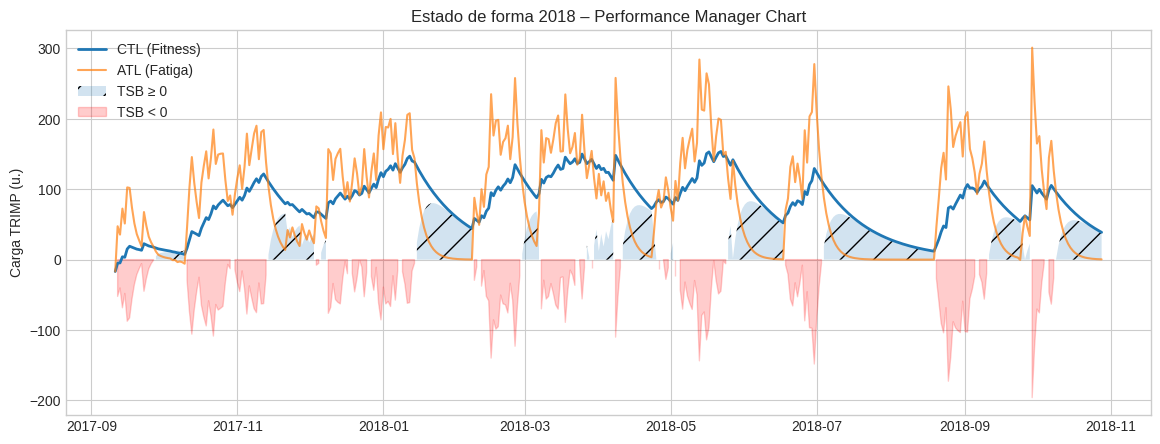

In [ ]:
#ver el estado de forma que he ido teniendo a lo largo de todos los entrenamientos
# --- parámetros personales (ajústalos)
HR_REST = 45          # frecuencia en reposo (ppm)
HR_MAX  = 185         # según tu ficha salía “F.C.MAX: 185”

# --- carga basada en la fórmula TRIMP clásica de Bannister -----------------
"""La TRIMP (Training Impulse) de Bannister es una medida de la carga de
 entrenamiento que busca cuantificar el estrés fisiológico de una sesión de
 ejercicio, combinando la duración y la intensidad.

 TRIMP=Duracion(min)×FC multiplicador X e^(B×FC relativa)

 -- Duración (min): Duración total del ejercicio en minutos.

 -- FC_multiplicador: Factor de ajuste por género (0.66 para mujeres, 1.67 para hombres).

 -- B: Constante que representa la pendiente de la curva de lactato (1.92 para mujeres, 1.67 para hombres).

 -- FC_relativa: Frecuencia cardíaca promedio de la sesión dividida por la frecuencia cardíaca máxima ((FC_promedio/FC_max)).

 -- e: Base del logaritmo natural (aproximadamente 2.71828).
 """

def calc_trimp(row):
    if pd.isna(row["fc_media"]):
        return np.nan            # entrenos sin pulsaciones → NaN
    # Factor de intensidad (0-1) sobre la reserva de pulso
    hr_ratio = (row["fc_media"] - HR_REST) / (HR_MAX - HR_REST)
    # Peso exponencial (mujer k=1.67, hombre k=1.92; elegimos 1.92)
    k = 1.92
    return row["tiempo_min"] * hr_ratio * np.exp(k * hr_ratio)

df["trimp"] = df.apply(calc_trimp, axis=1)

daily = (df[["trimp"]]
         .resample("D")              # cada día
         .sum()                      # suma de todos los entrenos de ese día
         .fillna(0))                 # días sin entrenar = 0
ATL_TC = 7     # time-constant aguda
CTL_TC = 42    # time-constant crónica

daily["ATL"] = daily["trimp"].ewm(span=ATL_TC, adjust=False).mean()
daily["CTL"] = daily["trimp"].ewm(span=CTL_TC, adjust=False).mean()
daily["TSB"] = daily["CTL"] - daily["ATL"]

import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))

plt.plot(daily.index, daily["CTL"], label="CTL (Fitness)", lw=2)
plt.plot(daily.index, daily["ATL"], label="ATL (Fatiga)", lw=1.5, alpha=0.7)
plt.fill_between(daily.index, daily["TSB"], 0,
                 where=daily["TSB"]>=0, alpha=0.2, hatch='/', label="TSB ≥ 0")
plt.fill_between(daily.index, daily["TSB"], 0,
                 where=daily["TSB"]<0, alpha=0.2, color="red", label="TSB < 0")

plt.title("Estado de forma 2018 – Performance Manager Chart")
plt.ylabel("Carga TRIMP (u.)")
plt.legend()
plt.grid(True)
plt.show()

